# Rapid EDA 3 - Data Dev Salary 2024

In [96]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot settings
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 16

In [97]:
# Read in data
dev_salary = pd.read_csv('data/data-dev-salary-2024.csv')

## Feature Descriptions from Kaggle
`experience_level`: Level of professional experience (e.g., junior, mid, senior).

`employment_type`: Type of job contract (e.g., full-time, part-time, contract).

`job_title`:The specific role or title of the employee (e.g., Data Engineer).

`salary`: The compensation received, in the original currency.

`salary_currency`:The currency in which the salary is paid.

`salary_in_usd`:The salary converted into US dollars for comparison.

`employee_residence`: The location where the employee resides.

`remote_ratio`: Percentage of work done remotely.

`company_location`: The geographical location of the company.

`company_size`: The scale of the company, often based on employee count.

In [109]:
# Look at the null values and data types for each column
dev_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [110]:
# First few rows
dev_salary.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M


In [100]:
# Summary statistics for 
dev_salary.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16534.000000,1.653400e+04,16534.000000,16534.000000
mean,2023.226866,1.637270e+05,149686.777973,32.003750
std,0.713558,3.402057e+05,68505.293156,46.245158
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.017630e+05,101125.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.872000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [101]:
dev_salary.describe(include='O')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,16534,16534,16534,16534,16534,16534,16534
unique,4,4,155,23,88,77,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,10670,16454,3464,15294,14467,14518,15306


In [102]:
for col in ['experience_level',
            'employment_type',
            'job_title',
            'employee_residence',
            'company_location',
            'company_size']:
    print(dev_salary[col].unique())

['SE' 'MI' 'EN' 'EX']
['FT' 'CT' 'PT' 'FL']
['AI Engineer' 'Data Engineer' 'Machine Learning Engineer' 'ML Engineer'
 'Data Analyst' 'NLP Engineer' 'Data Scientist' 'Applied Scientist'
 'Data Manager' 'Data Architect' 'Data Operations Manager'
 'Research Scientist' 'Data Science Manager'
 'Business Intelligence Engineer' 'Business Intelligence' 'Data Modeler'
 'Data Integration Specialist' 'Data Product Manager'
 'Data Visualization Specialist' 'Data Science' 'Data Specialist'
 'Business Intelligence Lead' 'Research Analyst'
 'Business Intelligence Analyst' 'AI Software Engineer'
 'Machine Learning Scientist' 'Data Science Engineer'
 'Machine Learning Operations Engineer' 'Analytics Engineer'
 'Data Management Analyst' 'Encounter Data Management Professional'
 'Data Analytics Specialist' 'Head of Data' 'Data Analytics Lead'
 'Research Engineer' 'AI Scientist' 'Business Intelligence Developer'
 'Machine Learning Developer' 'Data Management Specialist'
 'Data Infrastructure Engineer' 'BI

In [103]:
# Filter for data science positions
DATA_SCIENCE_MASK = dev_salary['job_title'].str.contains('Data Science|Data Scientist')
data_science_positions = dev_salary[DATA_SCIENCE_MASK]

#### Question 1: What is the average salary for different data science positions in USD?

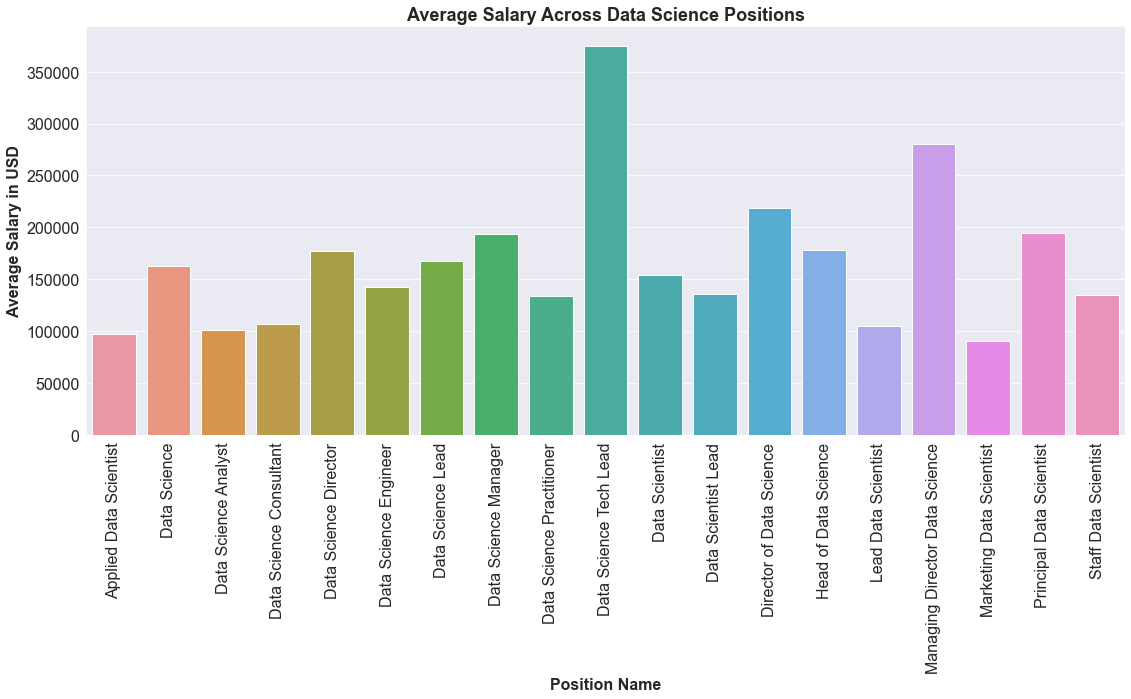

In [104]:
fig, ax = plt.subplots(figsize=(16, 10))
sns.barplot(x=data_science_positions.groupby('job_title')['salary_in_usd'].mean().index,
            y=data_science_positions.groupby('job_title')['salary_in_usd'].mean())
ax.set_title('Average Salary Across Data Science Positions', fontdict={'weight':'bold', 'fontsize':18})
ax.set_xlabel('Position Name', fontdict={'weight':'bold'})
ax.set_ylabel('Average Salary in USD', fontdict={'weight':'bold'})
ax.tick_params(axis='x', rotation=90)
plt.tight_layout();

#### Question 2: Still only regarding data science positions, what is the average salary across experience level?

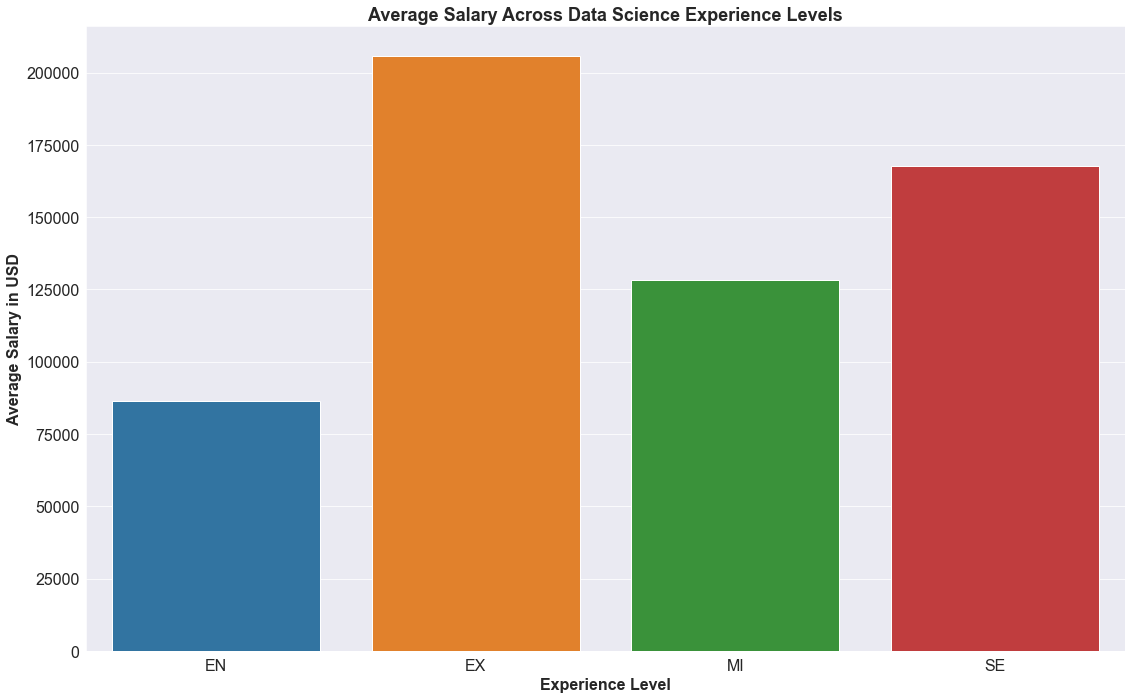

In [105]:
fig, ax = plt.subplots(figsize=(16, 10))
sns.barplot(x=data_science_positions.groupby('experience_level')['salary_in_usd'].mean().index,
            y=data_science_positions.groupby('experience_level')['salary_in_usd'].mean())
ax.set_title('Average Salary Across Data Science Experience Levels', fontdict={'weight':'bold', 'fontsize':18})
ax.set_xlabel('Experience Level', fontdict={'weight':'bold'})
ax.set_ylabel('Average Salary in USD', fontdict={'weight':'bold'})
plt.tight_layout();

#### Question 3: What is the distribution of remote ratios across small, medium, and large companies?

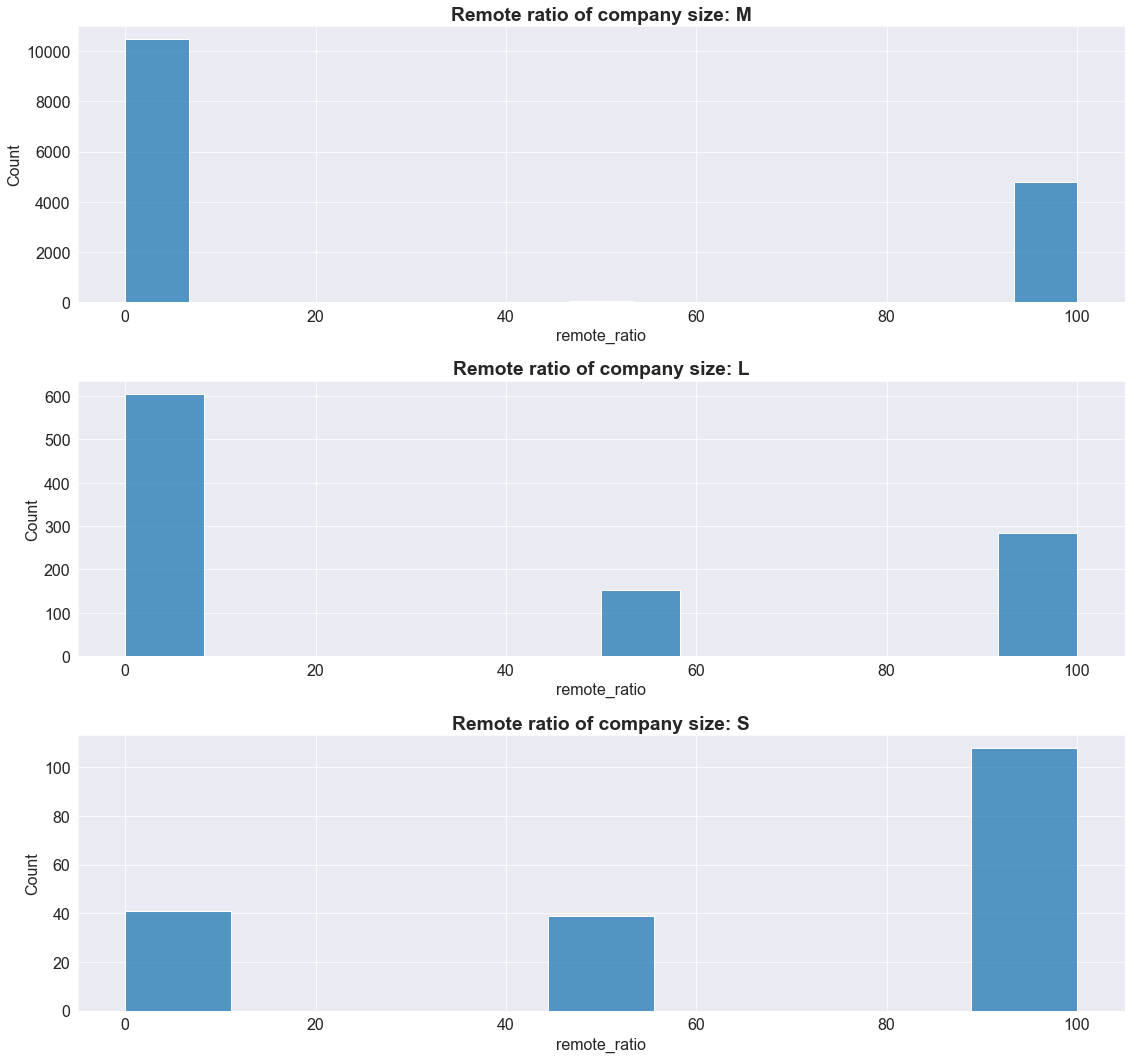

In [106]:
count = 0
fig, ax = plt.subplots(3, 1, figsize=(16, 15))
for size in dev_salary['company_size'].unique():
    sns.histplot(data=dev_salary.loc[dev_salary['company_size'] == size], x='remote_ratio', ax=ax[count])
    ax[count].set_title(f'Remote ratio of company size: {size}', fontdict={'weight':'bold'})
    count += 1
plt.tight_layout();

In [107]:
dev_salary['remote_ratio'].unique()

array([  0, 100,  50], dtype=int64)

#### Question 4: What is the distribution of employment type for data science positions?

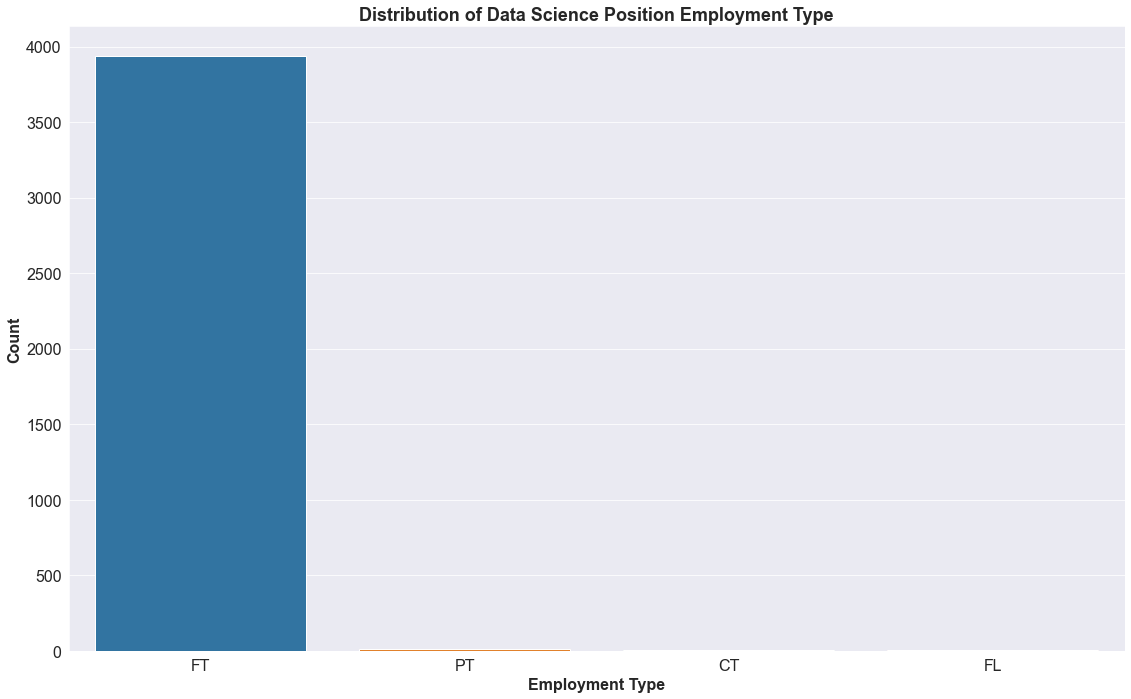

In [108]:
fig, ax = plt.subplots(figsize=(16, 10))
sns.barplot(x=data_science_positions['employment_type'].value_counts().index,
            y=data_science_positions['employment_type'].value_counts())
ax.set_title('Distribution of Data Science Position Employment Type', fontdict={'weight':'bold', 'fontsize':18})
ax.set_xlabel('Employment Type', fontdict={'weight':'bold'})
ax.set_ylabel('Count', fontdict={'weight':'bold'})
plt.tight_layout();

In [113]:
# What is the highest paid position?
dev_salary.sort_values(by='salary_in_usd', ascending=False).head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2804,2024,MI,FT,AI Architect,800000,USD,800000,CA,100,CA,M
